# Data Analysis:

In [1]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings('ignore')

import string
import re

# Data Handling:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_row', None)
pd.set_option('display.max_column', None)

%matplotlib inline
sns.set()

# NLP:
import nltk
from nltk import FreqDist
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download("wordnet")
nltk.download('words')

# TF-IDF & Bag of Words:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dibyendu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dibyendu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dibyendu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Dibyendu\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


### Step 01:

### Data Cleaning:

In [2]:
#read the data:

data = pd.read_csv("../Data/spam.csv", encoding="ISO-8859-1", usecols=['v1', 'v2'])
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
# rename the columns or features:

data.rename(columns={'v1':'target', 'v2':'msg'}, inplace=True)

In [4]:
# check there is any null values are present of not:

data.isnull().sum()

target    0
msg       0
dtype: int64

{'ham': 4825, 'spam': 747}


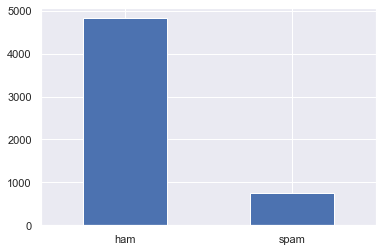

In [5]:
# check data is balanced or not based on "target" feature:

print(data['target'].value_counts().to_dict())
data['target'].value_counts().plot(kind='bar', rot=0)
plt.show()

In [6]:
# lowering the text & trim the text:

data['target'] = data['target'].apply(lambda x: x.strip())
data['target'] = data['target'].apply(lambda x: x.lower())

data['msg'] = data['msg'].apply(lambda x: x.strip())
data['msg'] = data['msg'].apply(lambda x: x.lower())

data.head()

,target,msg
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


In [7]:
# size of data:

data.shape

(5572, 2)

In [8]:
# Check & Handle duplicates:

print("shape of data: ", data.shape)
print("Total duplicate values: ", data.duplicated().sum(), '\n') # 415
data = data.drop_duplicates(keep='first')
print("After handle duplicates values: ", data.duplicated().sum())
print("shape of data: ", data.shape)

shape of data:  (5572, 2)
Total duplicate values:  415 

After handle duplicates values:  0
shape of data:  (5157, 2)


{'ham': 4515, 'spam': 642}


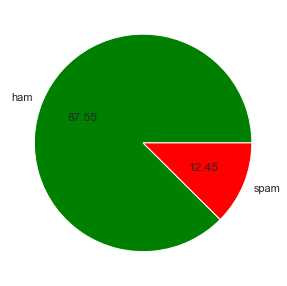

In [9]:
# check data is balanced or not based on "target" feature:

print(data['target'].value_counts().to_dict())

plt.figure(figsize=(5,5))
plt.pie(data['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f', colors=['green', 'red'])
plt.show()

In [10]:
# label encoding:

data['target'] = data['target'].map({'ham':1, 'spam':0})  # ham:1 spam:0

### Step 02:

### Exploratory Data Analysis:

In [11]:
# get the number of character, number of words & numbet of sentences:

data['no_of_character'] = data['msg'].apply(len)
data['no_of_words'] = data['msg'].apply(lambda x: len(word_tokenize(x)))
data['no_of_sentences'] = data['msg'].apply(lambda x: len(sent_tokenize(x)))
data.head()

,target,msg,no_of_character,no_of_words,no_of_sentences
0,1,"go until jurong point, crazy.. available only ...",111,24,1
1,1,ok lar... joking wif u oni...,29,8,1
2,0,free entry in 2 a wkly comp to win fa cup fina...,155,36,1
3,1,u dun say so early hor... u c already then say...,49,13,1
4,1,"nah i don't think he goes to usf, he lives aro...",61,15,1


In [12]:
# check data description:

data[['no_of_character', 'no_of_words', 'no_of_sentences']].describe()

,no_of_character,no_of_words,no_of_sentences
count,5157.000000,5157.000000,5157.000000
mean,78.791933,18.402172,1.879581
std,58.191975,13.286979,1.356693
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,116.000000,26.000000,2.000000
max,910.000000,216.000000,34.000000


In [13]:
# for ham, (ham=1), check data discription

data[data['target']==1][['no_of_character', 'no_of_words', 'no_of_sentences']].describe()

,no_of_character,no_of_words,no_of_sentences
count,4515.000000,4515.000000,4515.000000
mean,70.431008,17.109635,1.744408
std,56.355381,13.463161,1.291485
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,216.000000,34.000000


In [14]:
# for ham, (spam=0), check data discription

data[data['target']==0][['no_of_character', 'no_of_words', 'no_of_sentences']].describe()

,no_of_character,no_of_words,no_of_sentences
count,642.00000,642.000000,642.000000
mean,137.59190,27.492212,2.830218
std,30.29638,7.007513,1.423282
min,13.00000,2.000000,1.000000
25%,131.25000,25.000000,2.000000
50%,148.00000,29.000000,3.000000
75%,157.00000,32.000000,4.000000
max,224.00000,46.000000,9.000000


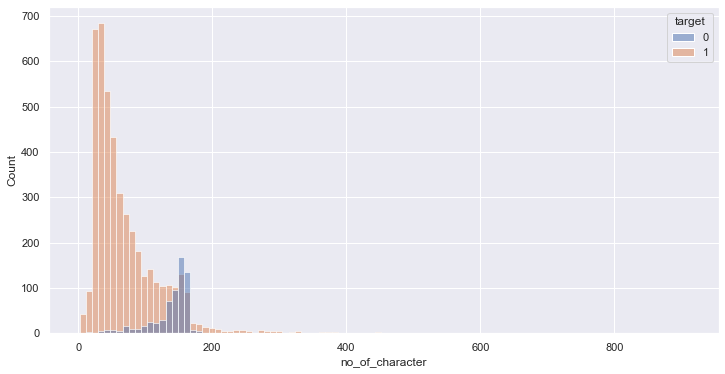

In [15]:
# check data distribution: for no_character feature

plt.figure(figsize=(12,6))
sns.histplot(data=data, x='no_of_character', hue='target')
plt.show()

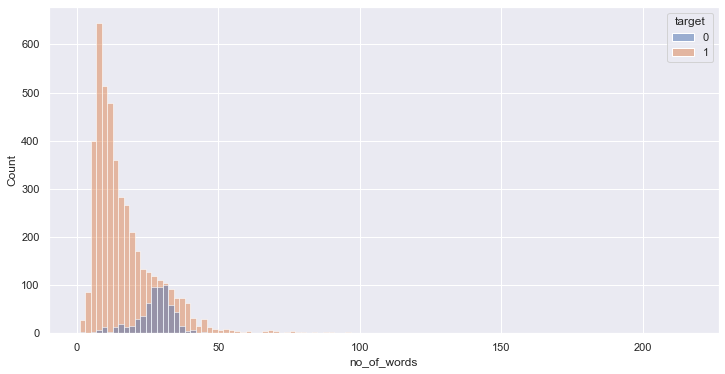

In [16]:
# check data distribution: for no_of_words feature

plt.figure(figsize=(12,6))
sns.histplot(data=data, x='no_of_words', hue='target')
plt.show()

<Figure size 1080x576 with 0 Axes>

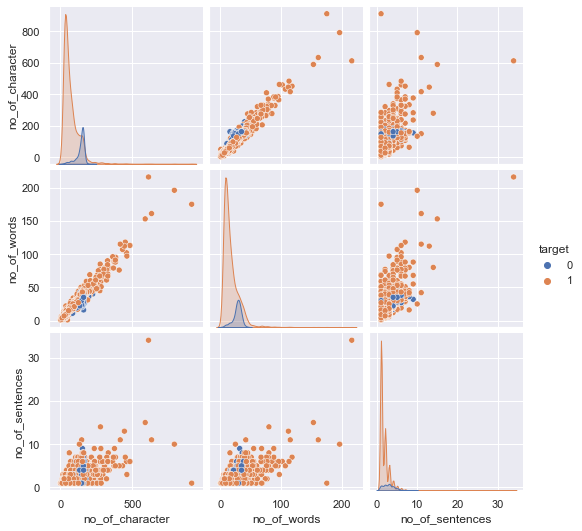

In [17]:
plt.figure(figsize=(15,8))
sns.pairplot(data=data, hue='target')
plt.show()

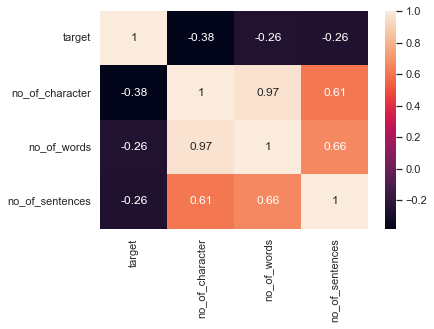

In [18]:
# find the Co-rrelation:

sns.heatmap(data.corr(), annot=True)
plt.show()

### Step 03: 

### Text Pre-Processing:

*  Lowering the text;
*  Removing the numbers;
*  Removing the punctuation;
*  Tokenize the text to word;
*  Removing the stop-of-words;
*  Stemming the text, etc.

In [19]:
def text_preprocessing(data, col):
    
    # Loweing the text:
    data[col] = data[col].apply(lambda x: x.lower())
    
    # Remove the numbers:
    data[col] = data[col].apply(lambda x:re.sub(r"\d+", '', x))
    
    # Remove the punctuation:
    translator = str.maketrans('', '', string.punctuation)
    data[col] = data[col].apply(lambda x: x.translate(translator))                          

    # Word Tokenize:
    data[col] = data[col].apply(lambda x: word_tokenize(x))                            
    
    # Remove the stop-of-words:
    stop_of_words = set(stopwords.words('english'))
    data[col] = data[col].apply(lambda x: [word for word in x if word not in stop_of_words])
                                
    # Stemming the data:
    porter = PorterStemmer()
    data[col] = data[col].apply(lambda x: [porter.stem(word) for word in x])
    
    # join with space:
    data[col] = data[col].apply(lambda x: " ".join(x))
    
    # after text-preprocessing return the data:
    return data    
    
    
data = text_preprocessing(data, 'msg')
data.head()

,target,msg,no_of_character,no_of_words,no_of_sentences
0,1,go jurong point crazi avail bugi n great world...,111,24,1
1,1,ok lar joke wif u oni,29,8,1
2,0,free entri wkli comp win fa cup final tkt st m...,155,36,1
3,1,u dun say earli hor u c alreadi say,49,13,1
4,1,nah dont think goe usf live around though,61,15,1


### Step 04:

### Analyze Word Frequency Distribution:

In [20]:
# Frequency Distribution: for ham: [target=1];  spam: [target=0]

ham_corpus = []
spam_corpus = []
for words in data[data['target']==1]['msg'].tolist():
    for word in words:
        ham_corpus.append(word)

for words in data[data['target']==0]['msg'].tolist():
    for word in words:
        spam_corpus.append(word)
        
        
ham_distribution = dict(FreqDist(ham_corpus))
spam_distribution = dict(FreqDist(ham_corpus))

### Step 05:

### Word Vectorization:

In [21]:
tfidf = TfidfVectorizer(max_features=1500)
X = tfidf.fit_transform(data['msg']).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
# Shape:

X.shape

(5157, 1500)

In [23]:
Y = data['target'].values

In [24]:
# Shape:

Y.shape

(5157,)

### Step 06:

### Save data:

* Save the data in **artifacts/Preprocessed_Data/data.csv** directory.

In [25]:
# save the X & Y as DataFrame:

data = pd.DataFrame(X)
data['target'] = Y

In [27]:
# find the shape:

data.shape

(5157, 1501)

In [30]:
# save the data in artifacts/Preprocessed_Data/data.csv directory.

data.to_csv("../artifacts/Preprocessed_Data/data.csv", index=None)